<font size="-1">FALL 2022
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="60px" align="right">
 </br>
<font size="-01">CIE 457, Statistical inference and data analysisCity</font>

<font size="-1">University of Science and Technology, Zewail City</font>

<br>

<h1 align="center">Assignment 6: </h1>
<h2 align="center">Linear regression analysis</h2>

---

<br>

Names & IDs:
- Abdelrahman Elaraby - 201700556
- Samaa Khair - 201901481

<h4><font color='orange'><ins> <center>DO NOT use any ready-made functions or libraries in this assignment.

# Q1: Download the [WHO life expectency dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download) from kaggle:

- Inspect the data, assess its quality, and do any
cleaning/ pre-processing steps you see necessary. List your steps.  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
import statsmodels.api as sm

df = pd.read_csv('/content/Life Expectancy Data.csv')
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop(columns=['Country'],inplace=True)

# Q2: Visualize the relationship between the average life expectancy and all other variables in the dataset.
-  Describe any trends you see, if any.

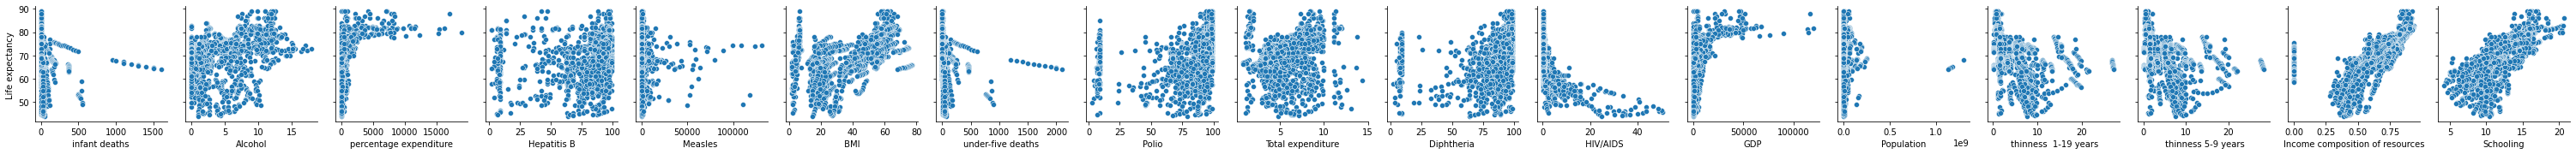

In [ ]:
sns.pairplot(data=df, x_vars=df.columns[4:22], y_vars='Life expectancy ')



It can be said that the relation between life expectancy and schooling can be expressed as a linear relation as well as the relationship between life expectancy and adult mortality.

# Q3: Implement a class 'MLR_model' that has the following finctionalities:
- Takes an X,Y dataset as an input at instantiation.
- Has a method to estimate the coefficients from X, and Y.
- Has a method to predict the y estimates given an array of X values.
- Has a method to calculate the R-squared statistic.
- Has a method to calculate the standard errors of the beta estimates.
- Has a method that finds a confidence interval around the point estimates of the coefficients, given a confidence level as input.
-Has a method that implements a significance t-test about the coefficient values ($H_0: β_i = 0$), and returns the t-statistics and the p-values.
- Has a method "summary" that prints out the following in a well-formatted way:
    * R-squared.
    * The predictor variable names along with:
    * their coefficients,
    * confidence intervals,
    * standard errors,
    * t-statistic values,
    * and p-values.

In [ ]:
class MLR_model():
    def __init__(self,Y,X):
       self.X=X
       self.Y=Y

    def estimate_betas(self):
        pseudoinverse_X=np.linalg.pinv(self.X)
        beta_hat = np.matmul(pseudoinverse_X, self.Y)

        return beta_hat


    def estimate_y_hat(self,X_new):
        return np.dot(self.X, self.estimate_betas())

    def R_squared(self):
      #calculating SSE
      y_hats = self.estimate_y_hat(self.X)
      SSE= np.sum((self.Y-y_hats)**2)

      #calculating TSS
      y_bar = np.mean(self.Y)
      TSS = np.sum((self.Y-y_bar)**2)

      #calculating R squared
      return 1- (SSE/TSS)

    def standard_errors_of_betas(self):
      n = len(self.Y)
      p = len(self.X.columns)

      SSE = sum(np.subtract(self.Y, self.estimate_y_hat(self.X))**2)

      X = np.asarray(self.X)

      varB = SSE /(n-p) * np.linalg.inv(np.dot(np.transpose(X), X))

      return np.sqrt(np.diagonal(varB))

    def confidence_intervals(self, conf_level=95):
      z = 1.96  #since using stats isn't allowed

      B = self.estimate_betas()
      SE = self.standard_errors_of_betas()

      lowerLimit = B - (z*SE)
      upperLimit = B + (z*SE)

      return (lowerLimit, upperLimit)

    def significance_t_test(self):
      return self.estimate_betas()/self.standard_errors_of_betas()

    def p_value(self):
      return 2*t.sf(self.significance_t_test(), len(self.Y)-2)

    def summary(self):
      predictors= self.X.columns.values.reshape(-1,1)
      lowerLimit, upperLimit = self.confidence_intervals()

      betas= self.estimate_betas()
      SE= self.standard_errors_of_betas()
      t_value=  self.significance_t_test()
      p_value=self.p_value()

      summary= {'Predictor':self.X.columns, 'Estimated Betas':self.estimate_betas(), 'Standard Error':self.standard_errors_of_betas(), 'T-test':self.significance_t_test(), 'p-val':self.p_value() , 'Lower Limit': lowerLimit, 'Upper Limit': upperLimit}
      s_dframe= pd.DataFrame.from_dict(summary)
      return s_dframe





# Q4: Construct a multiple linear regression model between the life expectency (response) and all other variables (predictors).
- You will need to numerically encode the categorical variables to be able to use them in your model.
- Use your MLR_model class.
- print out the model summary.

In [ ]:
#Ecoding Status column
one_hot = pd.get_dummies(df['Status'],prefix='Status' )
df = df.drop('Status',axis = 1)
df = df.join(one_hot)

col_baseline_dummy = df['Status_Developed']
df= df.drop(columns= ['Status_Developed'])

df.head().T


,0,1,2,3,4
Year,2.015000e+03,2014.000000,2.013000e+03,2.012000e+03,2.011000e+03
Life expectancy,6.500000e+01,59.900000,5.990000e+01,5.950000e+01,5.920000e+01
Adult Mortality,2.630000e+02,271.000000,2.680000e+02,2.720000e+02,2.750000e+02
infant deaths,6.200000e+01,64.000000,6.600000e+01,6.900000e+01,7.100000e+01
Alcohol,1.000000e-02,0.010000,1.000000e-02,1.000000e-02,1.000000e-02
percentage expenditure,7.127962e+01,73.523582,7.321924e+01,7.818422e+01,7.097109e+00
Hepatitis B,6.500000e+01,62.000000,6.400000e+01,6.700000e+01,6.800000e+01
Measles,1.154000e+03,492.000000,4.300000e+02,2.787000e+03,3.013000e+03
BMI,1.910000e+01,18.600000,1.810000e+01,1.760000e+01,1.720000e+01
under-five deaths,8.300000e+01,86.000000,8.900000e+01,9.300000e+01,9.700000e+01


In [ ]:
###NOT SURE ABOUT THE END RESULTS So I dropped the country column:(
"""
# Encoding Countries column
one_hot1 = pd.get_dummies(df['Country'],prefix='Country' )
# Drop column as it is now encoded
df = df.drop('Country',axis = 1)
# Join the encoded df
df = df.join(one_hot1)
df.head().T
"""



"\n# Encoding Countries column\none_hot1 = pd.get_dummies(df['Country'],prefix='Country' )\n# Drop column as it is now encoded\ndf = df.drop('Country',axis = 1)\n# Join the encoded df\ndf = df.join(one_hot1)\ndf.head().T\n"

##**Fitting the model**

In [ ]:
X = df.drop(columns=['Life expectancy '])
# add constant value for the intercept term
X['intercept'] = 1
Y = df['Life expectancy ']

linear_regression_model = MLR_model(Y,X)
linear_regression_model.summary()

,Predictor,Estimated Betas,Standard Error,T-test,p-val,Lower Limit,Upper Limit
0,Year,-1.271700e-01,2.308176e-02,-5.509545,2.000000e+00,-1.724102e-01,-8.192973e-02
1,Adult Mortality,-1.621074e-02,9.440983e-04,-17.170603,2.000000e+00,-1.806117e-02,-1.436030e-02
2,infant deaths,8.873270e-02,1.059395e-02,8.375786,1.158078e-16,6.796855e-02,1.094969e-01
3,Alcohol,-1.313143e-01,3.365770e-02,-3.901463,1.999901e+00,-1.972834e-01,-6.534519e-02
4,percentage expenditure,3.025752e-04,1.788928e-04,1.691377,9.095399e-02,-4.805472e-05,6.532052e-04
5,Hepatitis B,-3.257528e-03,4.448700e-03,-0.732243,1.535875e+00,-1.197698e-02,5.461925e-03
6,Measles,-1.033129e-05,1.069943e-05,-0.965593,1.665610e+00,-3.130217e-05,1.063958e-05
7,BMI,3.182913e-02,5.955049e-03,5.344898,1.031250e-07,2.015723e-02,4.350102e-02
8,under-five deaths,-6.661718e-02,7.672676e-03,-8.682392,2.000000e+00,-8.165563e-02,-5.157874e-02
9,Polio,5.797400e-03,5.120899e-03,1.132106,2.577547e-01,-4.239561e-03,1.583436e-02


##**Testing using the stat library model**

In [ ]:
lm = sm.OLS(Y, X )
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     422.9
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:59:08   Log-Likelihood:                -4421.2
No. Observations:                1649   AIC:                             8884.
Df Residuals:                    1628   BIC:                             8998.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                               -0.1272      0.023     -5.510      0.000      -0.172      -0.082
Adult Mortality                    -0.0162      0.001    -17.171      0.000      -0.018      -0.014
infant deaths                       0.0887      0.011      8.376      0.000       0.068       0.110
Alcohol                            -0.1313      0.034     -3.901      0.000      -0.197      -0.065
percentage expenditure              0.0003      0.000      1.691      0.091   -4.83e-05       0.001
Hepatitis B                        -0.0033      0.004     -0.732      0.464      -0.012       0.005
Measles                         -1.033e-05   1.07e-05     -0.966      0.334   -3.13e-05    1.07e-05
 BMI                                0.0318      0.006      5.345      0.000       0.020       0.044
under-five deaths                  -0.0666      0.008     -8.682      0.000      -0.082      -0.052
Polio                               0.0058      0.005      1.132      0.258      -0.004       0.016
Total expenditure                   0.0922      0.040      2.281      0.023       0.013       0.171
Diphtheria                          0.0140      0.006      2.387      0.017       0.002       0.026
 HIV/AIDS                          -0.4481      0.018    -25.174      0.000      -0.483      -0.413
GDP                              2.451e-05   2.83e-05      0.867      0.386   -3.09e-05    7.99e-05
Population                      -6.085e-10   1.73e-09     -0.351      0.726   -4.01e-09    2.79e-09
 thinness  1-19 years              -0.0058      0.053     -0.111      0.912      -0.109       0.097
 thinness 5-9 years                -0.0501      0.052     -0.966      0.334      -0.152       0.052
Income composition of resources    10.4497      0.833     12.549      0.000       8.816      12.083
Schooling                           0.8949      0.059     15.142      0.000       0.779       1.011
Status_Developing                  -0.8865      0.335     -2.644      0.008      -1.544      -0.229
intercept                         309.0072     46.210      6.687      0.000     218.369     399.645
==============================================================================
Omnibus:                       31.845   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.052
Skew:                          -0.107   Prob(JB):                     2.48e-13
Kurtosis:                       3.894   Cond. No.                     3.80e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+10. This might indicate that there are
strong multicollinearity or ot

# Q5: Which variables are the best predictors of life expectancy? which are the worst?
- For each variable, conduct a significance t-test with the null hypothesis that it has no effect on the response.  


As calculated and checked above, the p-value for the following features can reject the null-hypothesis successfully:

- Year
- Status_Developing
- Adult Mortality
- infant deaths
- Alcohol
- BMI
- under-five deaths
- Total expenditure
- Diphtheria
- HIV/AIDS
- Income composition of resources
- Schooling

However, features below are the worst predictors:
- Percentage Expenditure
- Hepatitis B
- Measeles
- GDP
- Population
- thinness 1-19 years
- thinness 5-9 years


# Q6: Choose the best 10 predictors of life expectancy and visualize the relationship between them.
- Are any of them correlated with each other?
- When some of your predictor variables are correlated, what is this phenomenon called?
- What kind of problems can this cause for your regression model?
- How do we go about solving this issue?

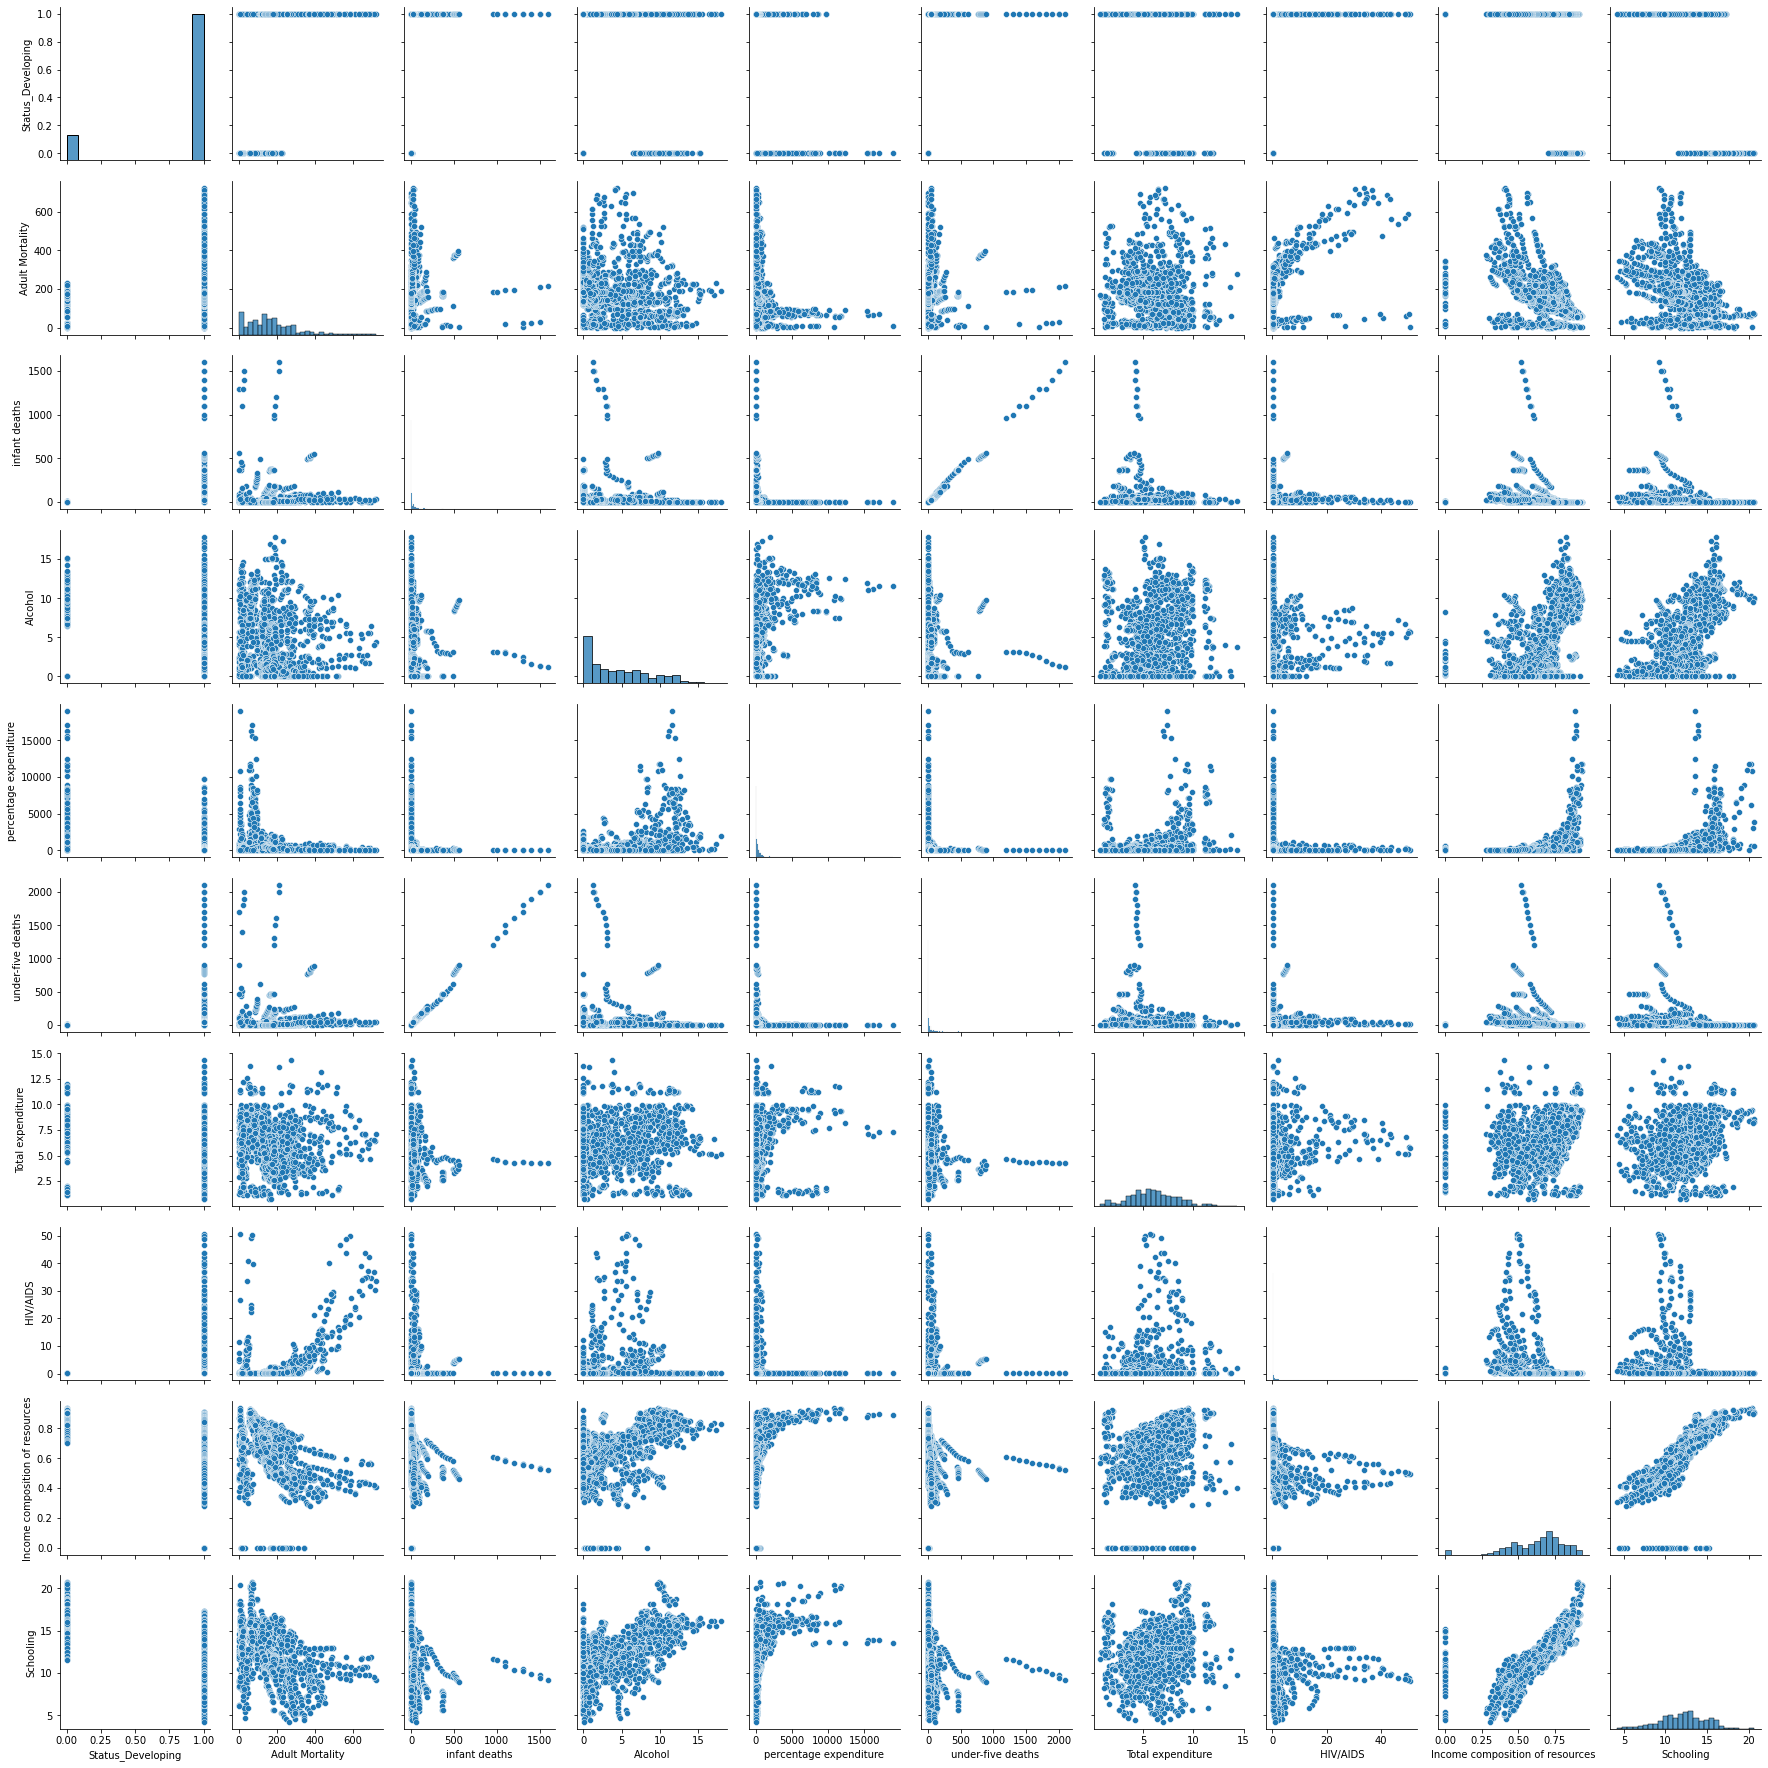

In [ ]:
Best_Predictors =['Status_Developing', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'under-five deaths ', 'Total expenditure',
        ' HIV/AIDS', 'Income composition of resources', 'Schooling']

sns.pairplot( df[Best_Predictors] )

- 'infant deaths' can be said to be correlated with 'under-five deaths'
- the phenomenon shown is a case of multi-collinearity
- it decreases the accuracy of the predicted coefficients, reducing the regression model's statistical power. Additionally, the p-values may not be reliable for determining whether independent variables are statistically significant.
- By excluding a correlated predictor

# Q7: Choose the best 5 uncorrelated predictors, and fit another model for predicting the life expectancy.

* Report the new coefficients and interpret their meaning (in words).
* Calculate the $R^2$ value of the model and comment on its value.

In [ ]:
uncorrelatedX = X[['Status_Developing','Alcohol', ' HIV/AIDS', 'Income composition of resources', 'Schooling', 'intercept']]
model = MLR_model(Y, uncorrelatedX)
print("R-squared value",model.R_squared())
model.summary()

R-squared value 0.7697571739744389


,Predictor,Estimated Betas,Standard Error,T-test,p-val,Lower Limit,Upper Limit
0,Status_Developing,-2.261029,0.381729,-5.923130,2.000000e+00,-3.009217,-1.512841
1,Alcohol,-0.184594,0.037282,-4.951303,1.999999e+00,-0.257667,-0.111521
2,HIV/AIDS,-0.614534,0.018127,-33.900854,2.000000e+00,-0.650063,-0.579004
3,Income composition of resources,14.544122,0.942198,15.436379,2.604279e-50,12.697414,16.390829
4,Schooling,1.278732,0.064727,19.755640,3.928563e-78,1.151866,1.405597
5,intercept,48.604025,0.743423,65.378713,0.000000e+00,47.146917,50.061134


The value of R-squared indicates a proper proportion of variabilty in the model of around 0.76

#Q8: Revise the model by introducing a higher-order and/or interaction term.
* Which variable(s) did you use? Justify your choice.
* Calculate the $R^2$ statistic and compare it to the baseline model.

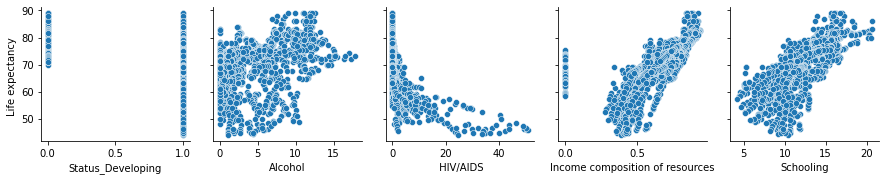

In [ ]:
columns_of_interest =['Status_Developing','Alcohol', ' HIV/AIDS', 'Income composition of resources', 'Schooling']
sns.pairplot(data=df, x_vars=df[columns_of_interest], y_vars='Life expectancy ')

In [ ]:
X1= X[['Status_Developing','Alcohol', ' HIV/AIDS', 'Schooling', 'intercept']]
X1['Income composition of resources^2']=X['Income composition of resources']**2
model= MLR_model(Y,X1)
print("R-squared value",model.R_squared())
model.summary()

R-squared value 0.803998921061074


<ipython-input-299-a7f29dc90306>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Income composition of resources^2']=X['Income composition of resources']**2


,Predictor,Estimated Betas,Standard Error,T-test,p-val,Lower Limit,Upper Limit
0,Status_Developing,-1.126016,0.356568,-3.157931,1.998382e+00,-1.824888,-0.427143
1,Alcohol,-0.266238,0.034734,-7.665144,2.000000e+00,-0.334316,-0.198160
2,HIV/AIDS,-0.553282,0.017098,-32.359291,2.000000e+00,-0.586794,-0.519770
3,Schooling,0.601266,0.071865,8.366569,1.248320e-16,0.460410,0.742122
4,intercept,54.242332,0.704518,76.992126,0.000000e+00,52.861477,55.623187
5,Income composition of resources^2,25.529786,1.072202,23.810610,6.178025e-108,23.428270,27.631302


using Income composition of resources has shown a higher R-squared value as well as a high correlation with life expectancy

# Q9: Fit another model with no intercept term:
* Compare it to a baseline with the same variables and an intercept. which one is better?
* Why does this change in the model's performance, if any, occurs?

* What does the intercept term physically mean in this context?

In [ ]:
X_NoIntercept= X1[['Status_Developing','Alcohol', ' HIV/AIDS', 'Schooling', 'Income composition of resources^2']]
model= MLR_model(Y,X_NoIntercept)
print("R-squared value",model.R_squared())
model.summary()

R-squared value 0.09684570922366031


,Predictor,Estimated Betas,Standard Error,T-test,p-val,Lower Limit,Upper Limit
0,Status_Developing,15.910825,0.600005,26.517819,2.500865e-129,14.734815,17.086834
1,Alcohol,-0.052598,0.074298,-0.707923,1.520907e+00,-0.198222,0.093027
2,HIV/AIDS,-0.450674,0.036580,-12.320220,2.000000e+00,-0.522371,-0.378977
3,Schooling,4.449829,0.110802,40.160178,1.888459e-246,4.232657,4.667001
4,Income composition of resources^2,4.439179,2.224532,1.995556,4.614674e-02,0.079095,8.799262


That shows a much lower R-square value, indicating the importance of the intercept column.
Intercept column in this context affects the Status_Developing column.